# Hilbert Kernel Testing

Tests for the extlib.py function for generating a Hilbert transform kernel.

In [1]:
%pylab inline
import sys,os
import numpy as np
import scipy.signal as ss
import scipy.misc as sm

sys.path.insert(0, os.path.join(sys.path[0], '..'))
import extlib as xl

Populating the interactive namespace from numpy and matplotlib


In [2]:
help(xl.hilbert_kernel)

Help on function hilbert_kernel in module extlib:

hilbert_kernel(N, band=0.9)
    Generate a Hilbert Transform kernel.
    
    Calculate a 2*N+1 length complex kernel to compute a Hilbert Transform as
    per:
    Turner, 2009: An efficient analytic signal generator
    
    Args:
            N: the half-length of the transform kernel.
            band: optional, specifies the bandwidth of the transform
                    in normalised frequency where 1.0 is the nyquist. Default is 0.9.
    
    Returns:
            A 2*N+1 long complex array with the kernel.



## Impulse Response

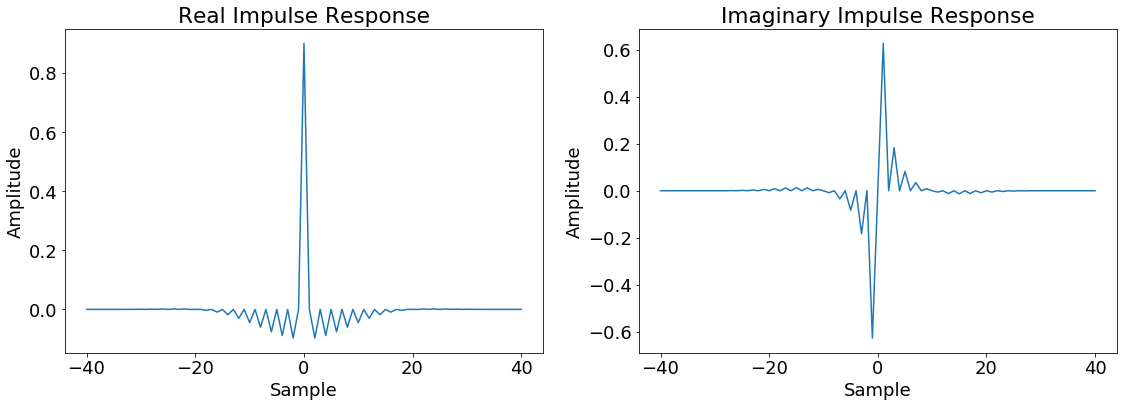

In [13]:
N = 40
Np = 2*N+1
kernel = xl.hilbert_kernel(N,0.9)
matplotlib.rcParams.update({'font.size': 18})
fig,axes = plt.subplots( 1,2, figsize=(16,6) )
axes[0].plot(np.linspace(-N,N,Np), np.real(kernel))
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Real Impulse Response')

axes[1].plot(np.linspace(-N,N,Np), np.imag(kernel))
axes[1].set_xlabel('Sample')
axes[1].set_ylabel('Amplitude')
axes[1].set_title('Imaginary Impulse Response')
fig.tight_layout()

## Frequency Response

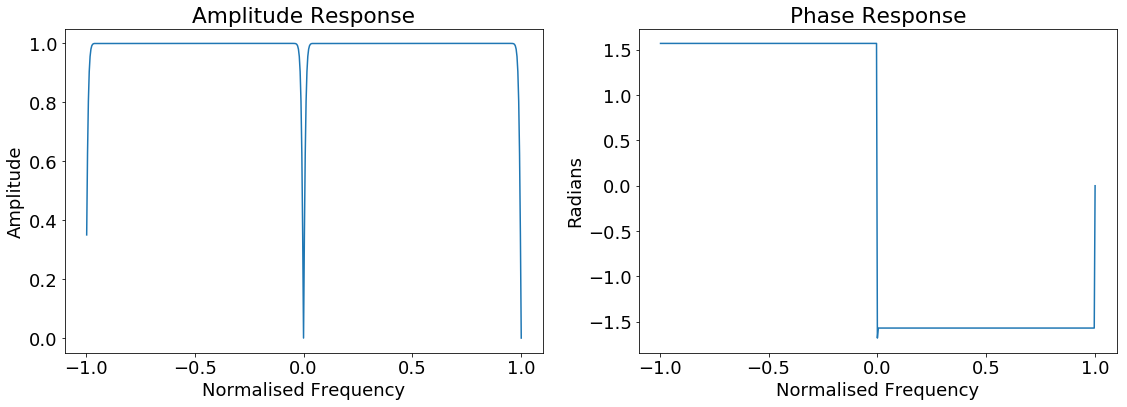

In [14]:
Om, Hi = ss.freqz(np.imag(kernel),whole=True)
Om, Hr = ss.freqz(np.real(kernel),whole=True)
Hf = Hi/Hr
Om = (Om/np.pi-1)*-1

fig,axes = plt.subplots( 1,2, figsize=(16,6) )

axes[0].plot(Om, np.abs(Hf))
axes[0].set_xlabel('Normalised Frequency')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Amplitude Response')

axes[1].plot(Om, np.angle(Hf))
axes[1].set_xlabel('Normalised Frequency')
axes[1].set_ylabel('Radians')
axes[1].set_title('Phase Response')
fig.tight_layout()